### 21BCE5715 
### Mahika Annie Verghese

<center><h1> Implementation of KNN Algorithm </h1> </center>

# Objective
The objective is to implement a K-Nearest Neighbors (KNN) classifier for classification tasks using a selected dataset. The goal is to optimize the KNN algorithm by finding the optimal number of neighbors (k) and evaluating its performance using appropriate metrics. The results will be evaluated using accuracy, precision, recall, and F1-score. 

# Dataset Description

This dataset contains information related to hotel bookings. It includes the following variables:

INDEPENDENT VARIABLES

1. Booking_ID: A unique identifier for each booking.

2. Number of Adults: The number of adults included in the booking.

3. Number of Children: The number of children included in the booking.

4. Number of Weekend Nights: The number of nights booked for the weekend.

5. Number of Week Nights: The number of nights booked for weekdays.

6. Type of Meal: The type of meal included in the booking 

7. Car Parking Space: Indicates whether a car parking space was requested or not (Yes or No).

8. Room Type: The type of room booked 

9. Lead Time: The number of days between the booking date and the arrival date.

10. Market Segment Type: The market segment for the booking 

11. Repeated: Indicates whether the booking is a repeat booking or not 

12. P-C: The number of previous cancellations for the customer.

13. P-not-C: The number of previous bookings that were not cancelled for the customer.

14. Average Price: The average price per night for the booking.

15. Special Requests: The number of special requests made by the customer.

16. Date of Reservation: The date when the booking was made.

DEPENDENT VARIABLE

17. Booking Status: The status of the booking (e.g., CANCELLED OR NOT CANCELLED)

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('booking.csv')
df = df.drop(df.index[8000:]) #taking the first 8000 rows 
df.head(20)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [2]:
df.shape #get the shape of dataframe created

(8000, 17)

In [3]:
df.isna().sum() #check the number of missing values in each column

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [4]:
columns_to_drop = ['Booking_ID', 'P-C', 'P-not-C','repeated','date of reservation','car parking space']
df = df.drop(columns_to_drop, axis=1)
df.head(10)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,Room_Type 1,224,Offline,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,Room_Type 1,5,Online,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,Room_Type 1,1,Online,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,Room_Type 1,211,Online,100.00,1,Canceled
4,1,0,1,2,Not Selected,Room_Type 1,48,Online,77.00,0,Canceled
5,1,0,0,2,Meal Plan 2,Room_Type 1,346,Offline,100.00,1,Canceled
6,1,1,1,4,Meal Plan 1,Room_Type 1,34,Online,107.55,1,Not_Canceled
7,3,0,1,3,Meal Plan 1,Room_Type 4,83,Online,105.61,1,Not_Canceled
8,1,1,0,4,Meal Plan 1,Room_Type 1,121,Offline,96.90,1,Not_Canceled
9,2,0,0,5,Meal Plan 1,Room_Type 4,44,Online,133.44,3,Not_Canceled


In [5]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)
df[categorical].head()

There are 4 categorical variables

The categorical variables are :

 ['type of meal', 'room type', 'market segment type', 'booking status']


,type of meal,room type,market segment type,booking status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled


In [6]:
for col in df.columns: #Checking the unique values in each column
    if df[col].dtype=='object':
        print(col)
        print(df[col].unique())

type of meal
['Meal Plan 1' 'Not Selected' 'Meal Plan 2']
room type
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market segment type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking status
['Not_Canceled' 'Canceled']


<Axes: xlabel='booking status', ylabel='Count'>

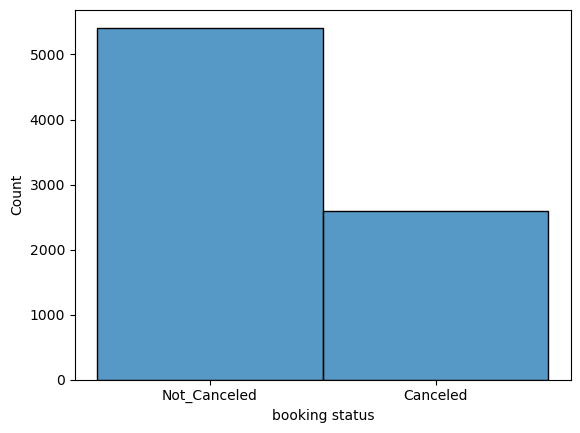

In [7]:
sns.histplot(df['booking status'])

### Preprocessing 

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
df.head() # now converted to numberical

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests,booking status
0,1,1,2,5,0,0,224,3,88.00,0,1
1,1,0,1,3,2,0,5,4,106.68,1,1
2,2,1,1,3,0,0,1,4,50.00,0,0
3,1,0,0,2,0,0,211,4,100.00,1,0
4,1,0,1,2,2,0,48,4,77.00,0,0


In [9]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests,booking status
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.850625,0.103875,0.812125,2.208875,0.386000,0.717375,85.346500,3.641375,103.612295,0.643375,0.676750
std,0.514631,0.404172,0.876883,1.430298,0.727888,1.401069,86.206248,0.661300,34.601788,0.800796,0.467746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,17.000000,3.000000,80.750000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,57.000000,4.000000,100.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,126.000000,4.000000,120.357500,1.000000,1.000000
max,4.000000,10.000000,6.000000,15.000000,2.000000,6.000000,443.000000,4.000000,306.000000,5.000000,1.000000


In [10]:
df.shape #after dropping check dimension

(8000, 11)

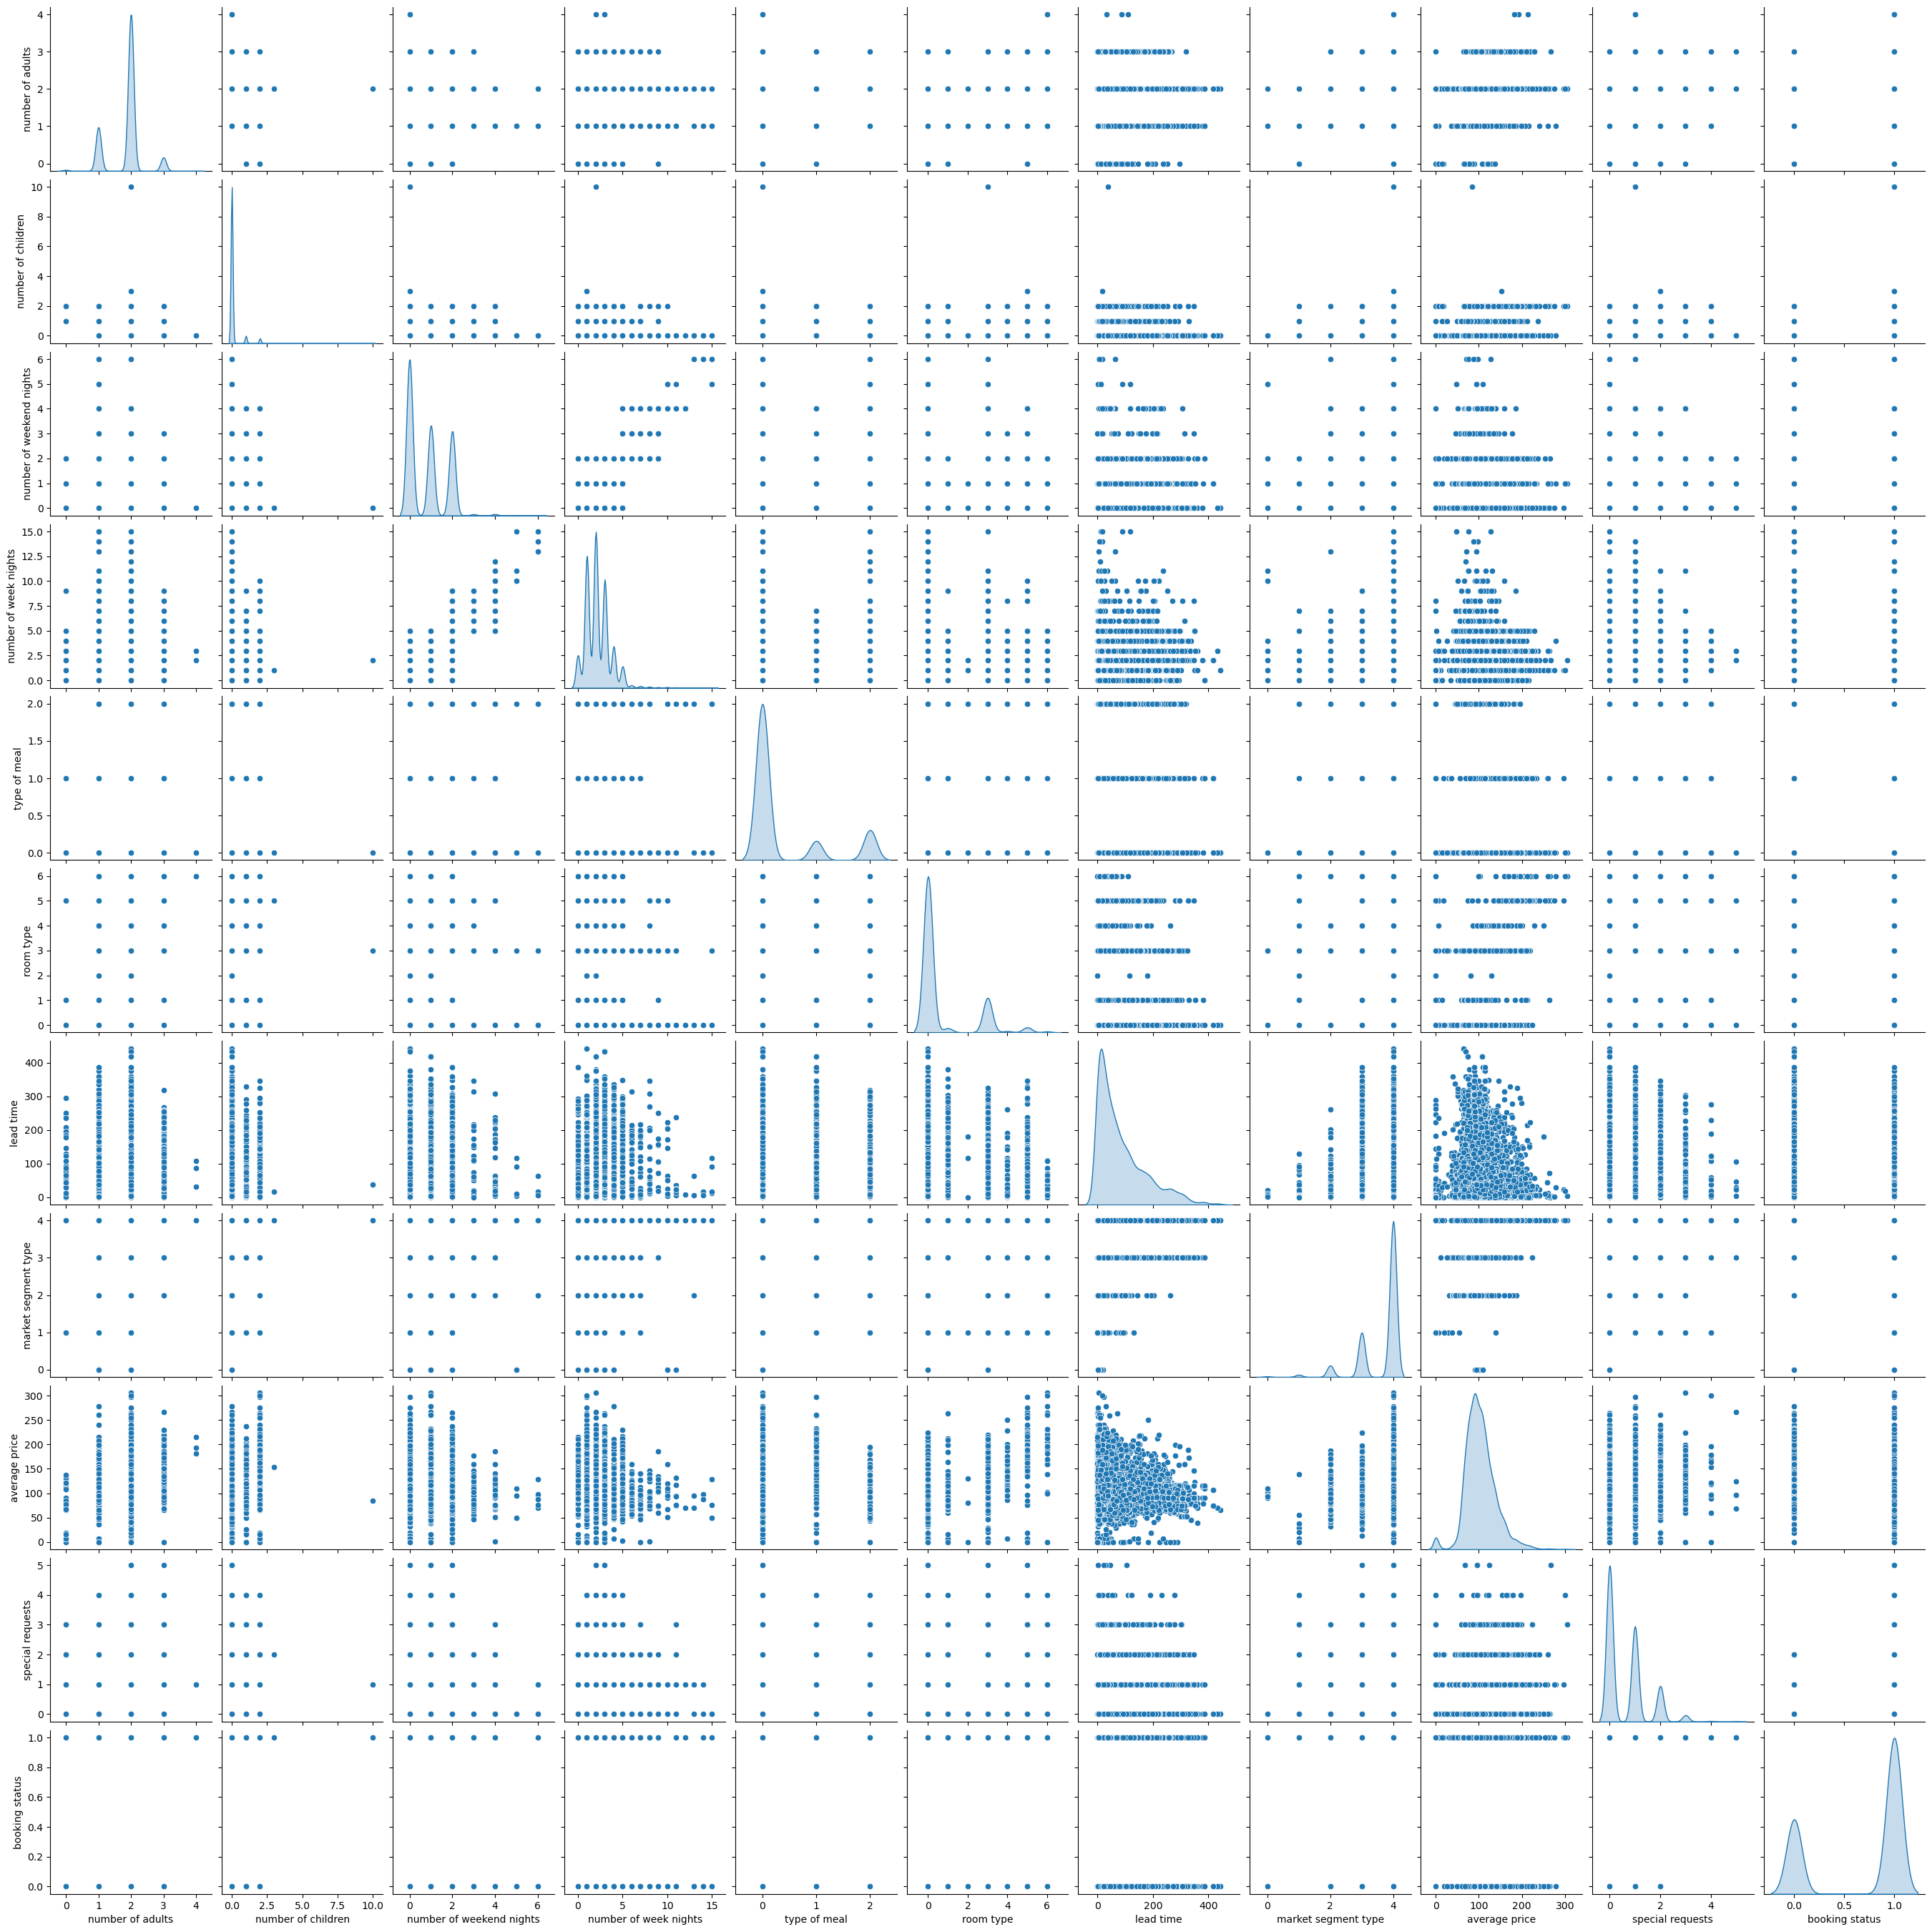

In [11]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [12]:
#getting the correlation matrix of dataframe
df.corr()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests,booking status
number of adults,1.000000,-0.037787,0.102360,0.087401,0.029459,0.269484,0.090644,0.310933,0.310488,0.179837,-0.080646
number of children,-0.037787,1.000000,0.020503,0.020636,-0.085315,0.332448,-0.037161,0.100103,0.299991,0.117173,-0.030670
number of weekend nights,0.102360,0.020503,1.000000,0.181905,-0.017401,0.049679,0.042005,0.120511,-0.011003,0.071568,-0.057864
number of week nights,0.087401,0.020636,0.181905,1.000000,-0.076492,0.087230,0.133229,0.109341,0.011650,0.044415,-0.097889
type of meal,0.029459,-0.085315,-0.017401,-0.076492,1.000000,-0.217744,-0.027767,0.169189,-0.063658,0.011637,-0.026733
room type,0.269484,0.332448,0.049679,0.087230,-0.217744,1.000000,-0.105233,0.110392,0.470708,0.132559,-0.033358
lead time,0.090644,-0.037161,0.042005,0.133229,-0.027767,-0.105233,1.000000,0.162405,-0.063871,-0.096211,-0.432134
market segment type,0.310933,0.100103,0.120511,0.109341,0.169189,0.110392,0.162405,1.000000,0.378733,0.235799,-0.309347
average price,0.310488,0.299991,-0.011003,0.011650,-0.063658,0.470708,-0.063871,0.378733,1.000000,0.175807,-0.143161
special requests,0.179837,0.117173,0.071568,0.044415,0.011637,0.132559,-0.096211,0.235799,0.175807,1.000000,0.252911


In [13]:
df.corr().round(2).style.background_gradient(cmap="viridis")

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests,booking status
number of adults,1.000000,-0.040000,0.100000,0.090000,0.030000,0.270000,0.090000,0.310000,0.310000,0.180000,-0.080000
number of children,-0.040000,1.000000,0.020000,0.020000,-0.090000,0.330000,-0.040000,0.100000,0.300000,0.120000,-0.030000
number of weekend nights,0.100000,0.020000,1.000000,0.180000,-0.020000,0.050000,0.040000,0.120000,-0.010000,0.070000,-0.060000
number of week nights,0.090000,0.020000,0.180000,1.000000,-0.080000,0.090000,0.130000,0.110000,0.010000,0.040000,-0.100000
type of meal,0.030000,-0.090000,-0.020000,-0.080000,1.000000,-0.220000,-0.030000,0.170000,-0.060000,0.010000,-0.030000
room type,0.270000,0.330000,0.050000,0.090000,-0.220000,1.000000,-0.110000,0.110000,0.470000,0.130000,-0.030000
lead time,0.090000,-0.040000,0.040000,0.130000,-0.030000,-0.110000,1.000000,0.160000,-0.060000,-0.100000,-0.430000
market segment type,0.310000,0.100000,0.120000,0.110000,0.170000,0.110000,0.160000,1.000000,0.380000,0.240000,-0.310000
average price,0.310000,0.300000,-0.010000,0.010000,-0.060000,0.470000,-0.060000,0.380000,1.000000,0.180000,-0.140000
special requests,0.180000,0.120000,0.070000,0.040000,0.010000,0.130000,-0.100000,0.240000,0.180000,1.000000,0.250000


<Axes: >

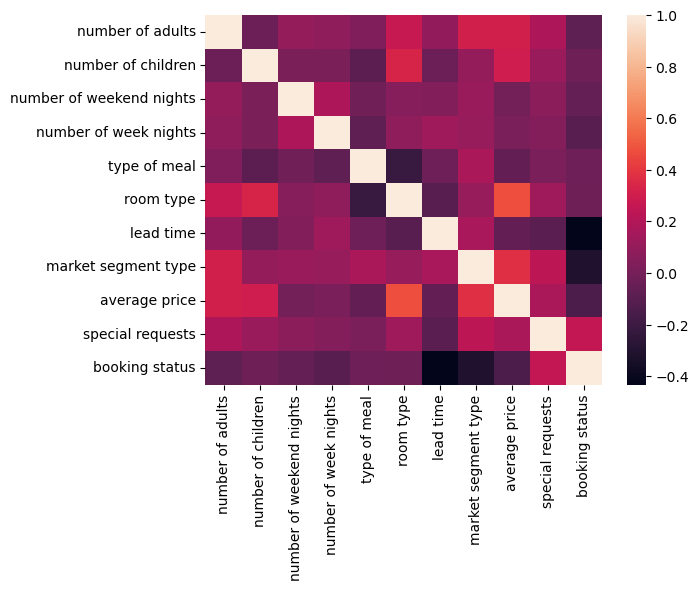

In [14]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

# Methodology
The K-Nearest Neighbors (KNN) algorithm is a non-parametric classification approach used for both classification and regression problems. It classifies new instances based on the majority vote of their k nearest neighbors in the feature space.

The methodology for KNN is as follows:

Data Preprocessing: The first step involves cleaning and preprocessing the dataset, which may include handling missing values, converting categorical variables into numerical ones, and normalizing the features. This ensures that the data is in a suitable format for KNN.

Choosing the Value of K: The value of k represents the number of nearest neighbors to consider when classifying a new instance. It is important to choose an appropriate value of k, as it can impact the performance of the algorithm. This can be determined using techniques such as cross-validation or grid search.

Calculating Distance: KNN uses a distance metric (e.g., Euclidean distance) to determine the similarity between instances in the feature space. The distance is calculated between the new instance and all other instances in the training set.

Selecting Neighbors: The k nearest neighbors are selected based on their distances from the new instance. These neighbors will have the most similar feature values to the new instance.

Majority Voting: The class label of the new instance is determined by the majority vote of the class labels of its k nearest neighbors. This means that the class with the highest frequency among the neighbors is assigned to the new instance.

Prediction and Evaluation: The KNN algorithm is then used to predict the class labels of unseen instances in the test set. The performance of the classifier is evaluated using appropriate metrics such as accuracy, precision, recall, and F1-score.

Visualization: Visualizing the results of the KNN algorithm can help understand the decision boundaries and the distribution of different classes in the feature space.

In [15]:
feature_cols = ['number of adults','number of children','number of weekend nights','number of week nights','type of meal','room type','lead time','market segment type','average price','special requests']

# Features
X = df[feature_cols]
y = df['booking status'] #dependant variable

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without normalization
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy without normalization: ", accuracy_score(y_test, y_pred))

# With normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_1 = knn.predict(X_test_scaled)
print("Accuracy with normalization: ", accuracy_score(y_test, y_pred_1))
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
f1score_1 = f1_score(y_test, y_pred_1)
print(f"Precision: {precision_1}")
print(f"Recall: {recall_1}")
print(f"F1 Score: {f1score_1}")

Accuracy without normalization:  0.77
Accuracy with normalization:  0.8291666666666667
Precision: 0.8641464855286474
Recall: 0.8904443091905052
F1 Score: 0.8770983213429256


In [24]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
print('Confusion matrix\n\n', cm_1)

Confusion matrix

 [[ 527  230]
 [ 180 1463]]


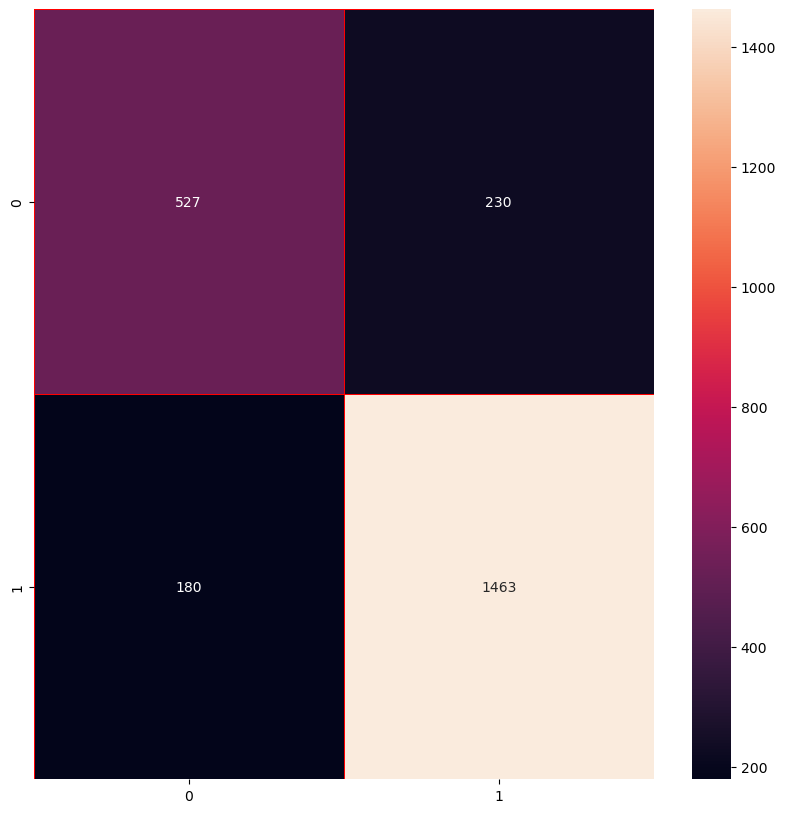

<Figure size 640x480 with 0 Axes>

In [25]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_1, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

The top left square (527) represents the true positives: the cases where the model correctly predicted the positive class.

The top right square (230) represents the false negatives: the cases where the model incorrectly predicted the negative class when it was actually the positive class.

The bottom left square (180) represents the false positives: the cases where the model incorrectly predicted the positive class when it was actually the negative class.

The bottom right square (1463) represents the true negatives: the cases where the model correctly predicted the negative class.

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       757
           1       0.86      0.89      0.88      1643

    accuracy                           0.83      2400
   macro avg       0.80      0.79      0.80      2400
weighted avg       0.83      0.83      0.83      2400



Precision: This is the ratio of true positives to the sum of true positives and false positives. It’s a measure of a classifier’s exactness. For class 0, the precision is 0.75, and for class 1, it’s 0.86.

Recall: This is the ratio of true positives to the sum of true positives and false negatives. It’s a measure of a classifier’s completeness. For class 0, the recall is 0.70, and for class 1, it’s 0.89.

F1-Score: This is the harmonic mean of precision and recall. It tries to find the balance between precision and recall. For class 0, the F1-score is 0.72, and for class 1, it’s 0.88.

Support: This is the number of samples of the true response that lie in that class. There are 757 samples for class 0 and 1643 samples for class 1.

Accuracy: This is the ratio of the total number of correct predictions to the total number of predictions. The accuracy of the model is 0.83.

Macro Avg: This is the average precision, recall, or F1-score between classes. The macro average is calculated by taking the mean of these scores, and it treats all classes equally, no matter what their size is. The macro average precision, recall, and F1-score are all 0.80.

Weighted Avg: This is the average precision, recall, or F1-score between classes, but when it’s calculated, it takes into account the number of samples in each class (support). The weighted average precision, recall, and F1-score are all 0.83.

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without normalization
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy without normalization: ", accuracy_score(y_test, y_pred))

# With normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_2 = knn.predict(X_test_scaled)
print("Accuracy with normalization: ", accuracy_score(y_test, y_pred_1))
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
f1score_2 = f1_score(y_test, y_pred_2)
print(f"Precision: {precision_2}")
print(f"Recall: {recall_2}")
print(f"F1 Score: {f1score_2}")

Accuracy without normalization:  0.77625
Accuracy with normalization:  0.8291666666666667
Precision: 0.8660092807424594
Recall: 0.9087035909920876
F1 Score: 0.8868428868428868


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       757
           1       0.87      0.91      0.89      1643

    accuracy                           0.84      2400
   macro avg       0.82      0.80      0.81      2400
weighted avg       0.84      0.84      0.84      2400



In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# With normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)
y_pred_3 = knn.predict(X_test_scaled)
accuracy_3 = accuracy_score(y_test, y_pred_3)
precision_3 = precision_score(y_test, y_pred_3)
recall_3 = recall_score(y_test, y_pred_3)
f1score_3 = f1_score(y_test, y_pred_3)

print(f"Accuracy: {accuracy_3}")
print(f"Precision: {precision_3}")
print(f"Recall: {recall_3}")
print(f"F1 Score: {f1score_3}")

Accuracy: 0.8325
Precision: 0.8790470372632865
Recall: 0.8758368837492392
F1 Score: 0.8774390243902438


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# With normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
y_pred_4 = knn.predict(X_test_scaled)
accuracy_4 = accuracy_score(y_test, y_pred_4)
precision_4 = precision_score(y_test, y_pred_4)
recall_4 = recall_score(y_test, y_pred_4)
f1score_4 = f1_score(y_test, y_pred_4)

print(f"Accuracy: {accuracy_4}")
print(f"Precision: {precision_4}")
print(f"Recall: {recall_4}")
print(f"F1 Score: {f1score_4}")

Accuracy: 0.79625
Precision: 0.9115549215406562
Recall: 0.7778454047474133
F1 Score: 0.8394088669950739


# Result analysis

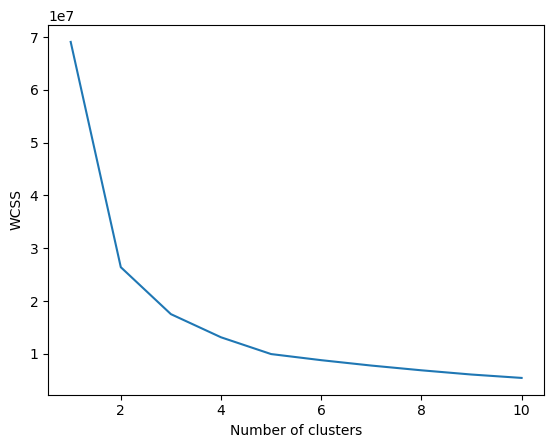

In [31]:
# plotting elbow curve
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

This type of plot is often used to determine the optimal number of clusters in k-means clustering by locating the “elbow point,” where the rate of decrease sharply changes. Here, the 'elbow' is around the cluster 5

In [32]:
cm = confusion_matrix(y_test, y_pred_3)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 559  198]
 [ 204 1439]]


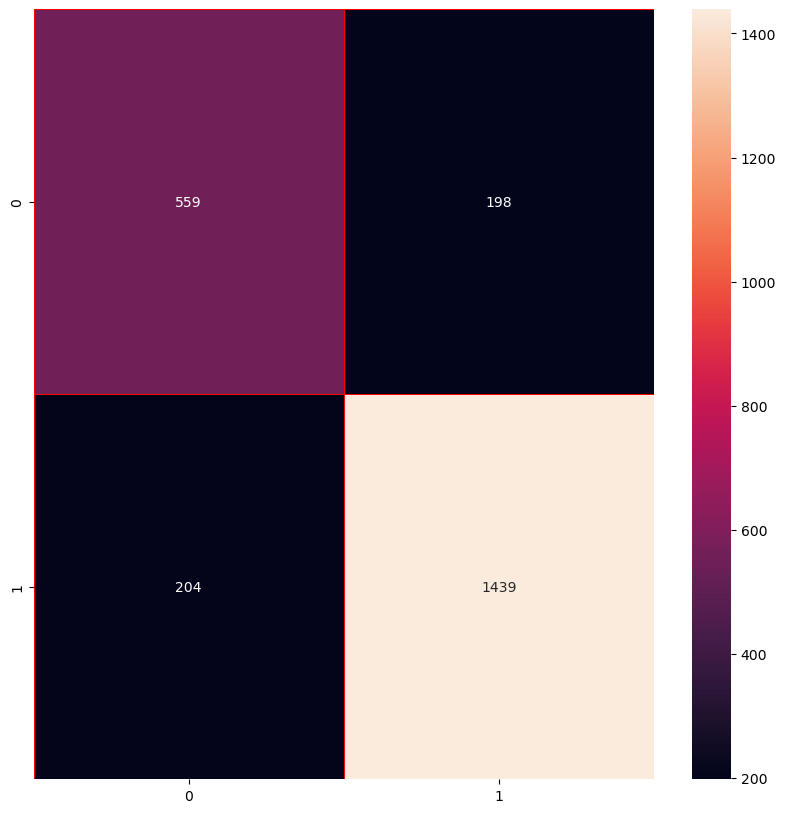

<Figure size 640x480 with 0 Axes>

In [33]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

The top left square (559) represents the true positives: the cases where the model correctly predicted the positive class.

The top right square (198) represents the false negatives: the cases where the model incorrectly predicted the negative class when it was actually the positive class.

The bottom left square (204) represents the false positives: the cases where the model incorrectly predicted the positive class when it was actually the negative class.

The bottom right square (1439) represents the true negatives: the cases where the model correctly predicted the negative class.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       757
           1       0.88      0.88      0.88      1643

    accuracy                           0.83      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.83      0.83      0.83      2400



Precision: This is the ratio of true positives to the sum of true positives and false positives. It’s a measure of a classifier’s exactness. For class 0, the precision is 0.73, and for class 1, it’s 0.88.

Recall: This is the ratio of true positives to the sum of true positives and false negatives. It’s a measure of a classifier’s completeness. For class 0, the recall is 0.74, and for class 1, it’s 0.88.

F1-Score: This is the harmonic mean of precision and recall. It tries to find the balance between precision and recall. For class 0, the F1-score is 0.74, and for class 1, it’s 0.88.

Support: This is the number of samples of the true response that lie in that class. There are 757 samples for class 0 and 1643 samples for class 1.

Accuracy: This is the ratio of the total number of correct predictions to the total number of predictions. The accuracy of the model is 0.83.

Macro Avg: This is the average precision, recall, or F1-score between classes. The macro average is calculated by taking the mean of these scores, and it treats all classes equally, no matter what their size is. The macro average precision, recall, and F1-score are all 0.81.

Weighted Avg: This is the average precision, recall, or F1-score between classes, but when it’s calculated, it takes into account the number of samples in each class (support). The weighted average precision, recall, and F1-score are all 0.83.

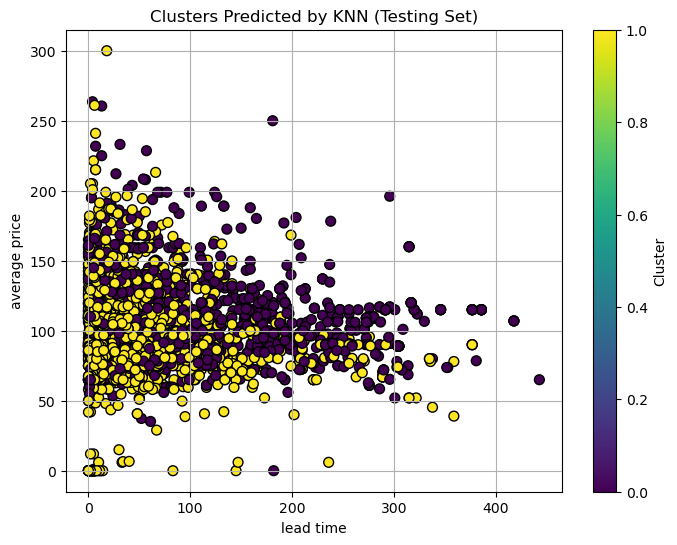

In [35]:
X_test_np = np.array(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_np[:, 6], X_test_np[:, 8], c=y_pred_4, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('lead time')  
plt.ylabel('average price') 
plt.title('Clusters Predicted by KNN (Testing Set)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Conclusion

In [38]:
from tabulate import tabulate

data = [
    ["Metric", "k = 3", "k = 5", "k = 6", "k = 2"],
    ["Classification Accuracy", "{0:0.4f}".format(accuracy_1), "{0:0.4f}".format(accuracy_2), "{0:0.4f}".format(accuracy_3), "{0:0.4f}".format(accuracy_4)],
    ["Precision", "{0:0.4f}".format(precision_1), "{0:0.4f}".format(precision_2), "{0:0.4f}".format(precision_3), "{0:0.4f}".format(precision_4)],
    ["Recall", "{0:0.4f}".format(recall_1), "{0:0.4f}".format(recall_2), "{0:0.4f}".format(recall_3), "{0:0.4f}".format(recall_4)],
    ["F1 Score", "{0:0.4f}".format(f1score_1), "{0:0.4f}".format(f1score_2), "{0:0.4f}".format(f1score_3), "{0:0.4f}".format(f1score_4)],
]

print(tabulate(data, headers="firstrow", tablefmt="grid"))

+-------------------------+---------+---------+---------+---------+
| Metric                  |   k = 3 |   k = 5 |   k = 6 |   k = 2 |
+=========================+=========+=========+=========+=========+
| Classification Accuracy |  0.8292 |  0.8413 |  0.8325 |  0.7963 |
+-------------------------+---------+---------+---------+---------+
| Precision               |  0.8641 |  0.866  |  0.879  |  0.9116 |
+-------------------------+---------+---------+---------+---------+
| Recall                  |  0.8904 |  0.9087 |  0.8758 |  0.7778 |
+-------------------------+---------+---------+---------+---------+
| F1 Score                |  0.8771 |  0.8868 |  0.8774 |  0.8394 |
+-------------------------+---------+---------+---------+---------+


Thus, model 2, with k = 5 is the optimal k value since every performance parameter is the highest for it

# References

https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction?resource=download 

https://towardsdatascience.com/k-nearest-neighbors-algorithm-in-python-by-example-79abc37a4443